In [1]:
import pandas as pd
import numpy as np
import nltk
import re
pd.set_option('max_colwidth',200)

## Processing

In [2]:
df = pd.read_csv('clean_data.csv',index_col=0)

In [3]:
df.head()

,commentBody
0,"My first impulse when I read this was to label it as an anxious overreaction: ""in the coming years, my son, who is 7 now, is more likely to be profiled or arrested ? or worse ? for no reason other..."
1,"Following my earlier comment, if you really want to ruin your Sunday you should follow up the Op-Ed by watching this video, produced by AI professors, that has gone viral. It shows how AI will not..."
2,"I'm reading a lot of unbridled racism in these comments. For those who are genuinely ignorant, let me recommend a book.\nhttp://www.nytimes.com/2012/03/07/books/michelle-alexanders-new-jim-crow....."
3,"I was just thinking about how AI might have helped us in Vietnam. With improved data on enemy deployments, we could have dragged the war out another five years before admitting our involvement was..."
4,"I agree 100%, Ms. Williams. AI is going to be very important in the future. It must be as unbiased as possible, and the programming must be checked for bias regularly. We can never condone bia..."


In [4]:
len(df.commentBody)

2250

In [5]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
## 备选 stopwords

# ['via','j','v','r','e','c','l','n',"data","la","est","et","mais","amp","pour","da",'se','il','pra','ml','um','com','une','q','human',
#  'science','ce','te','people','de','que','le','eu','je','pa','en','un','u','read','vous','uma','ma','na','h','qui','por','meu',
#  'http','mon','qui','du','moi','tu','need','one','p','sur','isso','huawei','dans','co','em','vai','tem','si','qu','ela','ou','plus',
#  'avec','vu','nem','make','b','customer','technology','help','python','system','datascience','tool','time','algorithm','research','work',
#  'software','company','marketing','project','minha','vem','suis','au','pq','police','g','vou','f','ta','iot','o','vc','ne','pr','india',
#  'op','way','para','face','gt','ser','esse','bill','year','voc','model','business','covid','news','fait','world','could','google','course',
#  'find','amazon','aws','non','industry','get','scientist','camera','stop','program','application','study','know','ele','article','role',
#  'quand','today','researcher','faire','check','essa','come','next','th','want','day','healthcare','think','tout','join','shinelearning',
#  'say','computer','giveaway','me','service','see','dia','contest','el','quando','di','parkermrvel','aa','aaa','aaaa','aaaaa','aaaaaa','nan',
#  'choisi','rt']

In [7]:
customized_stop_list = set()

In [8]:
for i in customized_stop_list:
    stop_words.append(i)

In [9]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
lan_stemmer = nltk.stem.LancasterStemmer()
p_stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [12]:
porter_result = []
lan_result = []
wordnet_result = []
for i in df['commentBody']:
  review = re.sub('((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',' ',i)
  review = re.sub('[^a-zA-z]',' ',review).lower()
  review = nltk.casual.TweetTokenizer().tokenize(review)
  
  porter_review = [p_stemmer.stem(word) for word in review if word not in set(stop_words)]
  porter_result.append(porter_review)
  
  lan_review = [lan_stemmer.stem(word) for word in review if word not in set(stop_words)]
  lan_result.append(lan_review)
  
  wordnet_review = [lemmatizer.lemmatize(word) for word in review if word not in set(stop_words)]
  wordnet_result.append(wordnet_review)

In [13]:
df_wordnet = pd.DataFrame(wordnet_result)
df_wordnet

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,first,impulse,read,label,anxious,overreaction,coming,year,son,likely,...,None,None,None,None,None,None,None,None,None,None
1,following,earlier,comment,really,want,ruin,sunday,follow,op,ed,...,None,None,None,None,None,None,None,None,None,None
2,reading,lot,unbridled,racism,comment,genuinely,ignorant,let,recommend,book,...,None,None,None,None,None,None,None,None,None,None
3,thinking,ai,might,helped,u,vietnam,improved,data,enemy,deployment,...,None,None,None,None,None,None,None,None,None,None
4,agree,m,williams,ai,going,important,future,must,unbiased,possible,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,trump,shown,someone,basically,literally,sell,united,state,profit,oracle,...,None,None,None,None,None,None,None,None,None,None
2246,trump,cut,deal,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2247,friend,mine,cyber,security,expert,said,never,install,tiktok,device,...,None,None,None,None,None,None,None,None,None,None
2248,trump,repeatedly,publicly,stated,precondition,allowing,u,company,acquire,tiktok,...,None,None,None,None,None,None,None,None,None,None


In [14]:
# Save data
f = open('wordnet_result.txt', 'w', encoding='utf-8')
f.write(str(wordnet_result))
f.close()

## WordCloud 

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
text = sum(wordnet_result,[])
text = " ".join(text)

In [17]:
wordcloud = WordCloud().generate(text)

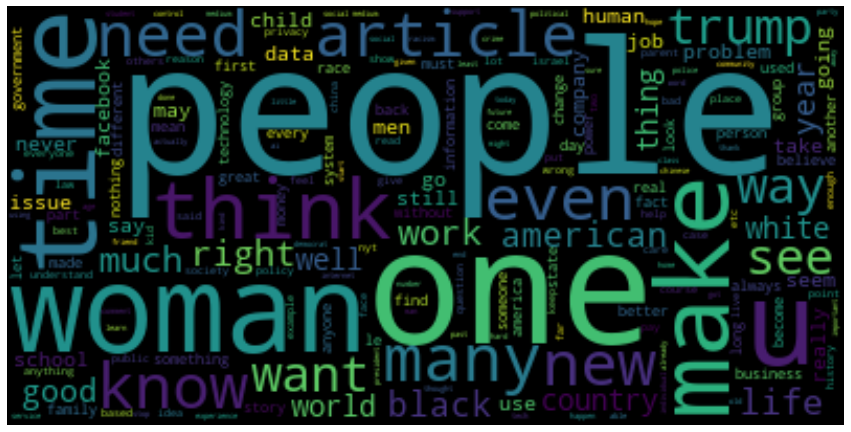

In [18]:
fig,ax1 = plt.subplots(figsize=(15,15))

ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis("off")
plt.show()

## Word Frequency 

In [19]:
from sklearn import feature_extraction
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
f=open('wordnet_result.txt')
wordnet_result = f.read()
wordnet_result = eval(wordnet_result)

In [21]:
len(wordnet_result)

2250

In [22]:
countVec = sklearn.feature_extraction.text.CountVectorizer()

In [23]:
text_list = []
for i in wordnet_result:
  sentence = " ".join(i)
  text_list.append(sentence)
len(text_list)

2250

In [24]:
X = countVec.fit_transform(text_list).toarray()
X.shape

(2250, 13219)

In [25]:
vocab = countVec.get_feature_names()
len(vocab)

13219

In [26]:
df_count = pd.DataFrame(X,columns=vocab)

In [27]:
word_count = df_count.sum(axis=0).sort_values(ascending=False)[0:80].sort_values(ascending=True)
word_count.index

Index(['money', 'information', 'without', 'used', 'believe', 'technology',
       'family', 'story', 'group', 'race', 'business', 'better', 'someone',
       'change', 'always', 'long', 'something', 'first', 'issue', 'going',
       'use', 'look', 'say', 'every', 'may', 'human', 'day', 'social', 'news',
       'state', 'facebook', 'really', 'never', 'real', 'government', 'still',
       'job', 'child', 'problem', 'take', 'country', 'medium', 'go', 'well',
       'data', 'new', 'company', 'thing', 'world', 'men', 'good', 'also',
       'life', 'much', 'could', 'work', 'way', 'see', 'school', 'know', 'want',
       'need', 'trump', 'even', 'article', 'black', 'right', 'think', 'get',
       'american', 'make', 'white', 'year', 'many', 'time', 'woman', 'would',
       'like', 'one', 'people'],
      dtype='object')

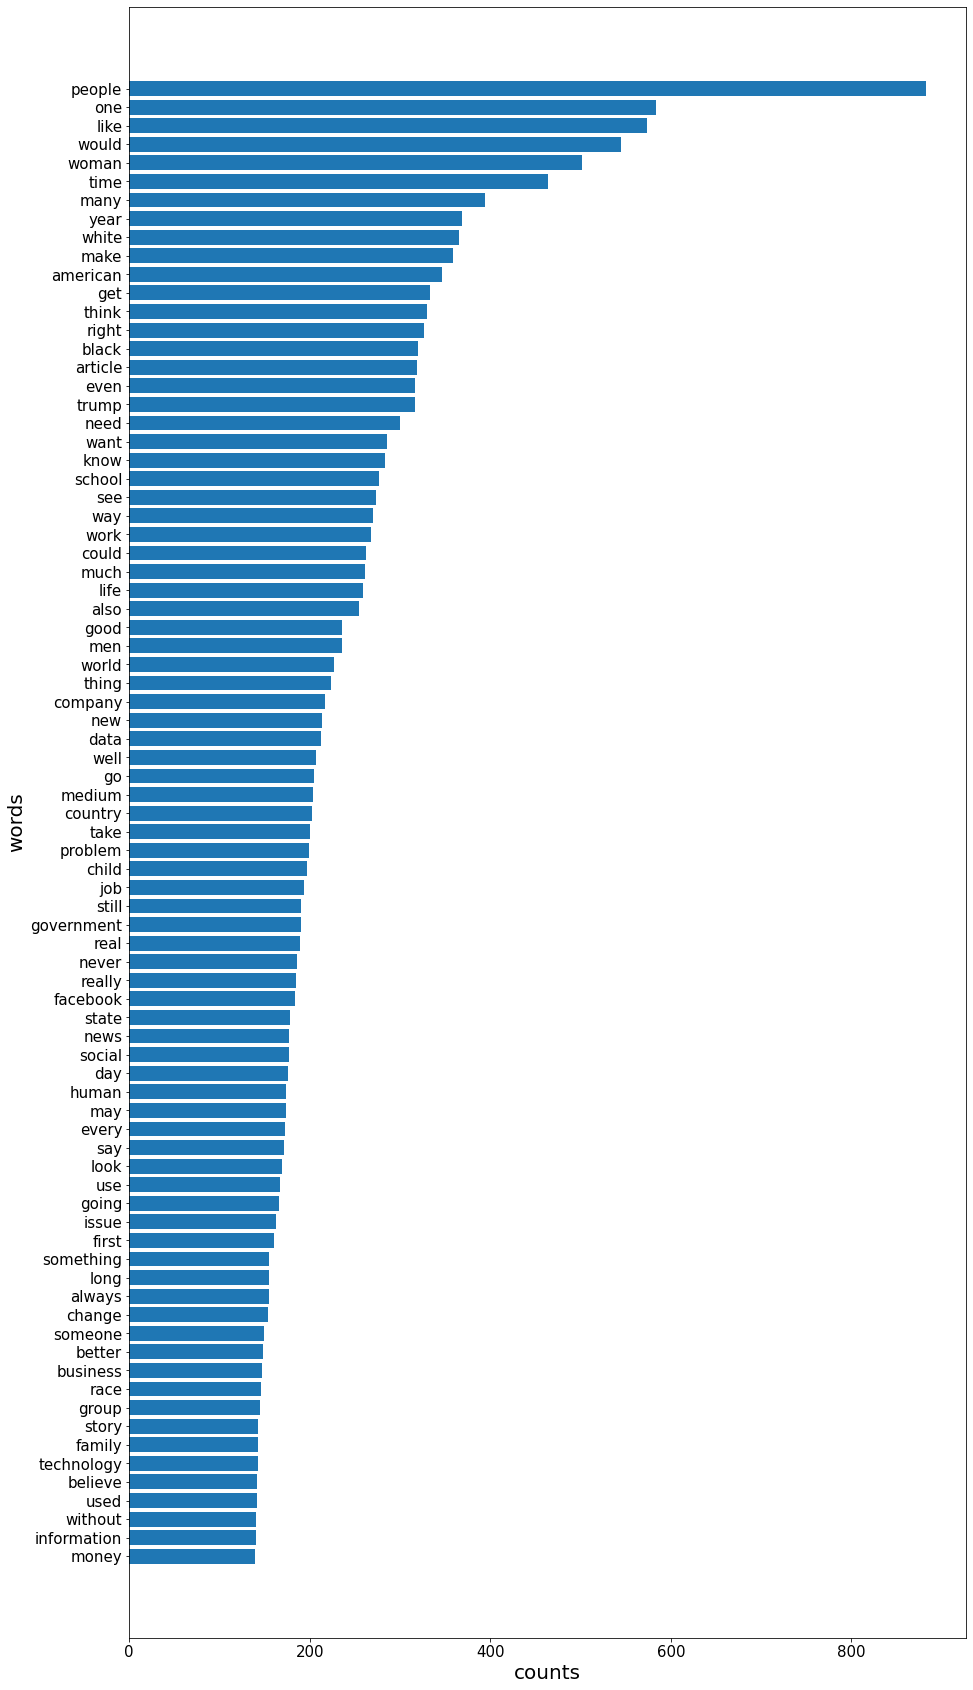

In [37]:
fig,ax1 = plt.subplots(figsize=(15,30))

ax1.barh(y = word_count.index, width= word_count.values)
ax1.set_xlabel('counts',fontsize=20)
ax1.set_ylabel('words',fontsize=20)
ax1.tick_params(labelsize=15)

plt.show()

## 2-Gram

In [29]:
countVec_2gram = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(2,2))

In [30]:
len(text_list)

2250

In [31]:
X_2gram = countVec_2gram.fit_transform(text_list).toarray()

In [32]:
vocab_2gram = countVec_2gram.get_feature_names()
len(vocab_2gram)

87345

In [33]:
df_count_2gram = pd.DataFrame(X_2gram,columns=vocab_2gram)
word_count_2gram = df_count_2gram.sum(axis=0).sort_values(ascending=False)[0:80].sort_values(ascending=True)
word_count_2gram.index

Index(['artificial intelligence', 'human being', 'people want', 'two year',
       'good idea', 'seems like', 'group people', 'anyone else',
       'tech company', 'real people', 'domestic worker', 'health insurance',
       'sound like', 'law enforcement', 'equal pay', 'middle class',
       'white black', 'ny time', 'black voter', 'tech industry',
       'anti semitism', 'working class', 'woman team', 'white parent',
       'people like', 'one day', 'president trump', 'human right', 'many time',
       'chinese government', 'james beard', 'silicon valley', 'free speech',
       'feel like', 'something like', 'young people', 'machine learning',
       'donald trump', 'last year', 'white male', 'justice stevens',
       'even though', 'health care', 'many year', 'san francisco',
       'sexual harassment', 'right wing', 'civil right', 'york time',
       'democratic party', 'black white', 'white men', 'every day',
       'climate change', 'fox news', 'men woman', 'public school', 'one 

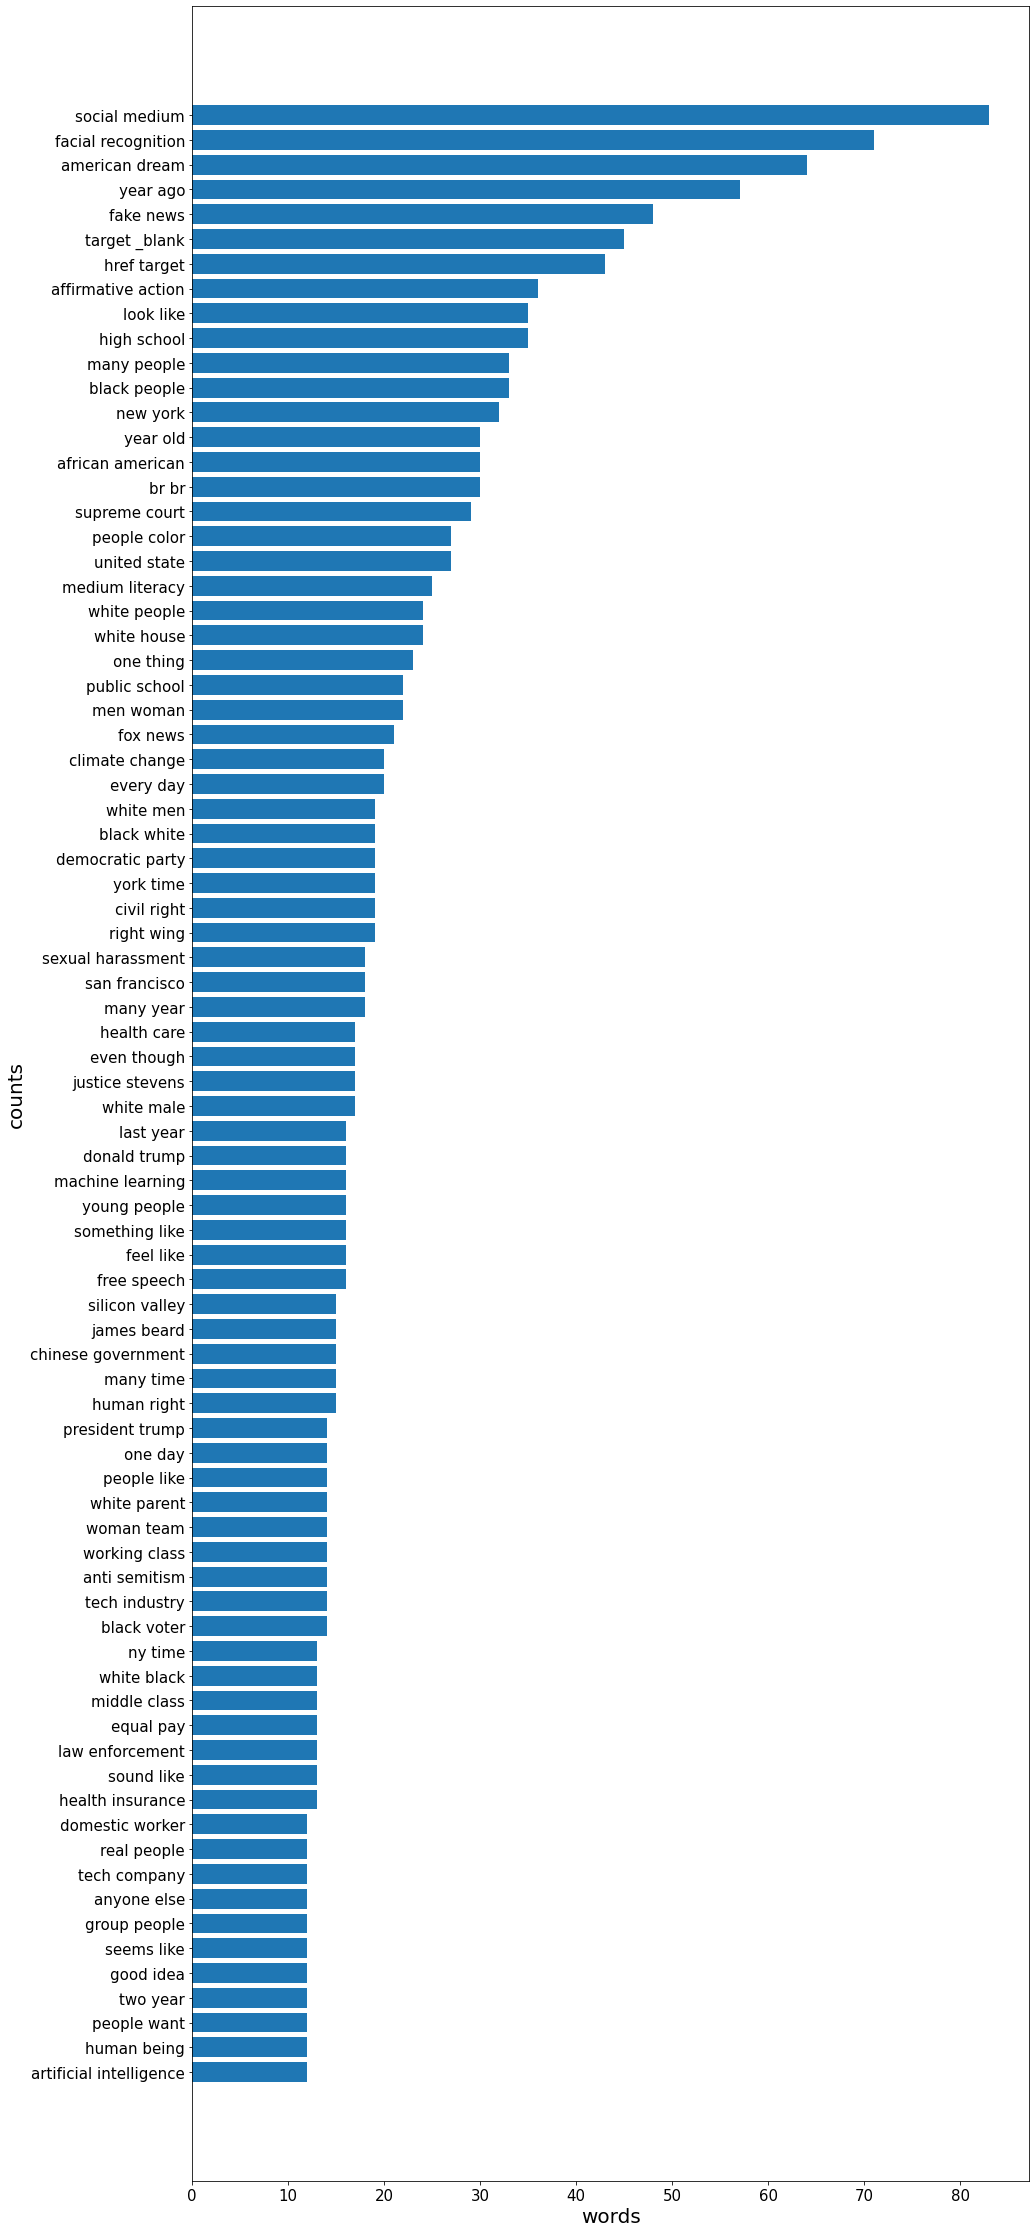

In [34]:
fig,ax1 = plt.subplots(figsize=(15,40))

ax1.barh(y = word_count_2gram.index, width= word_count_2gram.values)
ax1.set_xlabel('words',fontsize=20)
ax1.set_ylabel('counts',fontsize=20)
ax1.tick_params(labelsize=15)

plt.show()